<a href="https://colab.research.google.com/github/danifdezcaa/Trabajo-IA-II/blob/main/Segundo_Trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TRABAJO 2: MACHINE LEARNING**

En este segundo trabajo se va a realizar un problema de clasificación mediantes regresió logística, para ello se va a emplear el mismo dataset que en el trabajo 1.



## 1. Dataset seleccionado

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

El data set seleccionado recoge datos relacionado con las enfermedades cardiovasculares.

Las enfermedades cardiovasculares (ECV) son la principal causa de muerte mundial, con 17,9 millones de fallecimientos al año (31 % del total). Cuatro de cada cinco muertes se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio ocurre en personas menores de 70 años. Este conjunto de datos incluye 11 características para predecir enfermedades cardíacas.

Las personas con ECV o alto riesgo (hipertensión, diabetes, hiperlipidemia, etc.) requieren detección y manejo tempranos, donde el aprendizaje automático puede ser útil.

In [3]:
#Se importan las librerías numpy y pandas
import pandas as pd
import numpy as np

In [4]:
#Se importa el datasety se almacena en la variable 'dataset'
csv_url="https://raw.githubusercontent.com/danifdezcaa/Trabajo-IA-II/refs/heads/main/heart.csv"
dataset=pd.read_csv(csv_url) #Con este comando leemos el csv y lo almacenamos en 'data'

### 1.1. Variables en el dataset

A continuación, se describen las variables en el dataset

1. **Age**:  
   - **Definición**: Edad del paciente en años.  
   - **Importancia**: La edad es un factor clave en enfermedades cardiovasculares, ya que la probabilidad de problemas cardíacos suele aumentar con la edad.  

2. **Sex**:  
   - **Definición**: Sexo del paciente.  
   - **Categorías**:  
     - **M**: Masculino.  
     - **F**: Femenino.  
   - **Importancia**: Existen diferencias biológicas y de riesgo entre hombres y mujeres respecto a las enfermedades cardíacas.

3. **ChestPainType**:  
   - **Definición**: Tipo de dolor en el pecho que experimenta el paciente.  
   - **Categorías**:  
     - **TA**: Angina típica, generalmente asociada con enfermedad coronaria.  
     - **ATA**: Angina atípica, no necesariamente relacionada con problemas cardíacos.  
     - **NAP**: Dolor no anginoso, generalmente de origen no cardíaco.  
     - **ASY**: Asintomático, sin dolor en el pecho.  
   - **Importancia**: El tipo de dolor puede indicar la probabilidad de enfermedad cardíaca.

4. **RestingBP**:  
   - **Definición**: Presión arterial en reposo medida en mm Hg.  
   - **Importancia**: La presión arterial alta (hipertensión) es un factor de riesgo importante para enfermedades cardíacas.

5. **Cholesterol**:  
   - **Definición**: Colesterol sérico en mg/dl.  
   - **Importancia**: Niveles altos de colesterol están asociados con el riesgo de acumulación de placa en las arterias, lo que puede conducir a enfermedades cardíacas.

6. **FastingBS**:  
   - **Definición**: Nivel de azúcar en sangre en ayunas.  
   - **Categorías**:  
     - **1**: Si el nivel es mayor a 120 mg/dl.  
     - **0**: Si el nivel es menor o igual a 120 mg/dl.  
   - **Importancia**: La diabetes o la glucosa elevada son factores de riesgo cardiovascular.

7. **RestingECG**:  
   - **Definición**: Resultados del electrocardiograma en reposo.  
   - **Categorías**:  
     - **Normal**: Electrocardiograma normal.  
     - **ST**: Anormalidades en la onda ST-T (elevación, depresión o inversiones).  
     - **LVH**: Hipertrofia del ventrículo izquierdo según los criterios de Estes.  
   - **Importancia**: Las anormalidades en el ECG pueden indicar problemas cardíacos subyacentes.

8. **MaxHR**:  
   - **Definición**: Frecuencia cardíaca máxima alcanzada durante el ejercicio.  
   - **Importancia**: Un nivel reducido puede indicar una menor capacidad funcional o problemas cardíacos.

9. **ExerciseAngina**:  
   - **Definición**: Angina inducida por el ejercicio.  
   - **Categorías**:  
     - **Y**: Sí.  
     - **N**: No.  
   - **Importancia**: La presencia de angina durante el ejercicio suele asociarse con isquemia miocárdica.

10. **Oldpeak**:  
    - **Definición**: Valor numérico que representa la depresión del segmento ST respecto a la línea base del ECG.  
    - **Importancia**: La depresión del segmento ST puede ser un marcador de isquemia o daño al corazón.

11. **ST_Slope**:  
    - **Definición**: Pendiente del segmento ST durante el ejercicio.  
    - **Categorías**:  
      - **Up**: Ascendente.  
      - **Flat**: Plana.  
      - **Down**: Descendente.  
    - **Importancia**: La pendiente puede reflejar problemas en la irrigación del corazón, con una pendiente descendente siendo más preocupante.

12. **HeartDisease**:  
    - **Definición**: Clase de salida que indica si el paciente tiene enfermedad cardíaca.  
    - **Categorías**:  
      - **1**: Enfermedad cardíaca.  
      - **0**: Normal, sin enfermedad cardíaca.  
    - **Importancia**: Es el objetivo principal del dataset, utilizado para modelar o predecir la presencia de enfermedad cardíaca.  

In [5]:
#Se muestra el dataset
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


#### 1.1.1 Clasificación de las Variables

* Variables numéricas discretas:

  - Age
  - Resting Blood Presure
  - Cholesterol
  - Maximum heart rate achieved
  - Fasting Blood Sugar
  - Heart disease

* Variables numéricas contínuas

  - Oldpeak

* Variables categóricas ordinales:

  - Slope of the peak exercise
  - Resting Electrocardiogram

* Variables categóricas nominales:

  - Sex
  - Exercise angina
  - Chest Pain type

In [6]:
#Se comprueban los tipos de datos en las variables del dataset
dataset.dtypes



,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


Como se ve con el código anterior, las variables que pertenecen al tipo 'object' son variables categóricas y las que pertenecen al tipo 'int64' y 'float64' son variables numéricas

In [7]:
#Se comprueba si hay datos nulos en el dataset
dataset.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


Como se observa en el código el dataset no presenta datos nulos


### 1.2. Modificación de los datos

Debido a que se presentan datos categóricos, se deben de convertir a datos numéricos

Lod datos ordinales se deben de ordenar en función del peso

Los datos nominales se deben de convertir usando una clasificación one-hot

#### 1.2.1. Datos Categóricos ordinales

Comenzando con las variables categóricas ordinales, se va a convertir:
- la variable 'ST_Slope'de forma que ahora 'Up' = 3, 'Flat' = 2 y 'Down' = 1
- la variable 'RestingECGde forma que 'ST' = 3, 'LVH' = 2 y 'Normal' = 1

In [8]:
# Comenzando con las variables categóricas ordinales, se va a convertir la variable 'ST_Slope'
# de forma que ahora 'Up' = 3, 'Flat' = 2 y 'Down' = 1 y la variable 'RestingECG
# de forma que 'ST' = 3, 'LVH' = 2 y 'Normal' = 1 se va a almacenar en
# 'dataset2'

dataset2 = dataset.copy()
dataset2['ST_Slope'] = dataset2['ST_Slope'].map({'Up': 3, 'Flat': 2, 'Down': 1})
dataset2['RestingECG'] = dataset2['RestingECG'].map({'ST': 3, 'LVH': 2, 'Normal': 1})
dataset2.head(10)




,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,N,0.0,3,0
1,49,F,NAP,160,180,0,1,156,N,1.0,2,1
2,37,M,ATA,130,283,0,3,98,N,0.0,3,0
3,48,F,ASY,138,214,0,1,108,Y,1.5,2,1
4,54,M,NAP,150,195,0,1,122,N,0.0,3,0
5,39,M,NAP,120,339,0,1,170,N,0.0,3,0
6,45,F,ATA,130,237,0,1,170,N,0.0,3,0
7,54,M,ATA,110,208,0,1,142,N,0.0,3,0
8,37,M,ASY,140,207,0,1,130,Y,1.5,2,1
9,48,F,ATA,120,284,0,1,120,N,0.0,3,0


#### 1.2.2. Datos categóricos nominales

Cuando dentro de una variable no hay una categoría que tenga mayor peso que la otra se debe de aplocar One-Hot encoding.

En este caso se va a aplicar a las variables Sex, Exercise angina y Chest Pain type

In [9]:
# ahora se continua con las variables nominales, en este caso se va a aplicar la
# técnica One-Hot encoding a las variables 'Sex', 'ChestPainType', 'ExerciseAngina' y se almacenan en 'dataset3'

dataset3 = dataset2.copy()
dataset3 = pd.get_dummies(dataset3, columns=['Sex', 'ChestPainType', 'ExerciseAngina'])
dataset3.head(10)


,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ExerciseAngina_N,ExerciseAngina_Y
0,40,140,289,0,1,172,0.0,3,0,False,True,False,True,False,False,True,False
1,49,160,180,0,1,156,1.0,2,1,True,False,False,False,True,False,True,False
2,37,130,283,0,3,98,0.0,3,0,False,True,False,True,False,False,True,False
3,48,138,214,0,1,108,1.5,2,1,True,False,True,False,False,False,False,True
4,54,150,195,0,1,122,0.0,3,0,False,True,False,False,True,False,True,False
5,39,120,339,0,1,170,0.0,3,0,False,True,False,False,True,False,True,False
6,45,130,237,0,1,170,0.0,3,0,True,False,False,True,False,False,True,False
7,54,110,208,0,1,142,0.0,3,0,False,True,False,True,False,False,True,False
8,37,140,207,0,1,130,1.5,2,1,False,True,True,False,False,False,False,True
9,48,120,284,0,1,120,0.0,3,0,True,False,False,True,False,False,True,False


Como se puede observar, se obtienen columnas innecesarias.

En el caso de sex, por ejemplo con una columna sería suficiente:

| Sex_F | Sex_M |
|-------|-------|
| 1     | 0     |
| 0     | 1     |

        ⬇

| Sex: M = 1 F = 0 |
|------------------|
| 1                |
| 0                |

Lo mismo ocurre con 'ExerciseAngina'

Con 'chestPainType' serán necesarias "dos columnas"

In [10]:
# para solucionar el problema se va a aplicar de nuevo la técnica One-hot
# encoding a las variables 'Sex' y 'ExerciseAngina' eliminando el
# primer dummy y se almacenan en 'dataset4'

dataset4 = dataset2.copy()
dataset4 = pd.get_dummies(dataset4, columns=['Sex', 'ExerciseAngina'], drop_first=True)
dataset4.head(10)



,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ExerciseAngina_Y
0,40,ATA,140,289,0,1,172,0.0,3,0,True,False
1,49,NAP,160,180,0,1,156,1.0,2,1,False,False
2,37,ATA,130,283,0,3,98,0.0,3,0,True,False
3,48,ASY,138,214,0,1,108,1.5,2,1,False,True
4,54,NAP,150,195,0,1,122,0.0,3,0,True,False
5,39,NAP,120,339,0,1,170,0.0,3,0,True,False
6,45,ATA,130,237,0,1,170,0.0,3,0,False,False
7,54,ATA,110,208,0,1,142,0.0,3,0,True,False
8,37,ASY,140,207,0,1,130,1.5,2,1,True,True
9,48,ATA,120,284,0,1,120,0.0,3,0,False,False


Para el caso de 'sex' y 'ExerciseAngina' el problema está casi resuelto, sin embargo hay que modificar 'chestPainType'

La modificación será la siguiente:

* Para ChestPainType:
  - TA: Typical Angina, se asigna la variable booleana 00
  - ATA: Atypical Angina, se asigna la variable booleana 01
  - NAP: Non-Anginal Pain, se asigna la variable booleana 10
  - ASY: Asymptomatic, se asigna la variable booleana 11


In [11]:
# Para 'ChestPaintype' se hace la siguiente asignación y se almacena todo en
# 'dataset5':
# TA: se asigna la variable booleana 00
# ATA: se asigna la variable booleana 01
# NAP: se asigna la variable booleana 10
# ASY: se asigna la variable booleana 11
dataset5 = dataset4.copy()
dataset5['ChestPainType'] = dataset5['ChestPainType'].map({'TA': '00', 'ATA': '01', 'NAP': '10', 'ASY': '11'})
dataset5.head(10)




,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ExerciseAngina_Y
0,40,01,140,289,0,1,172,0.0,3,0,True,False
1,49,10,160,180,0,1,156,1.0,2,1,False,False
2,37,01,130,283,0,3,98,0.0,3,0,True,False
3,48,11,138,214,0,1,108,1.5,2,1,False,True
4,54,10,150,195,0,1,122,0.0,3,0,True,False
5,39,10,120,339,0,1,170,0.0,3,0,True,False
6,45,01,130,237,0,1,170,0.0,3,0,False,False
7,54,01,110,208,0,1,142,0.0,3,0,True,False
8,37,11,140,207,0,1,130,1.5,2,1,True,True
9,48,01,120,284,0,1,120,0.0,3,0,False,False


### 1.3. Más ajustes en el dataset

Para dejar el dataset "listo" vamos a transformar las variables 'HeartDisease' y 'FastingBS' en variables booleana.

Tambien se debe renombrar 'Sex_M' como 'Sex' y 'ExerciseAngina_Y' como 'ExerciseAngina'



In [12]:
#En 'dataset5' transformamos las variable 'HeartDisease' y 'FastingBS' como booleanas
dataset5['HeartDisease'] = dataset5['HeartDisease'].astype(bool)
dataset5['FastingBS'] = dataset5['FastingBS'].astype(bool)
dataset5.head(10)

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_M,ExerciseAngina_Y
0,40,01,140,289,False,1,172,0.0,3,False,True,False
1,49,10,160,180,False,1,156,1.0,2,True,False,False
2,37,01,130,283,False,3,98,0.0,3,False,True,False
3,48,11,138,214,False,1,108,1.5,2,True,False,True
4,54,10,150,195,False,1,122,0.0,3,False,True,False
5,39,10,120,339,False,1,170,0.0,3,False,True,False
6,45,01,130,237,False,1,170,0.0,3,False,False,False
7,54,01,110,208,False,1,142,0.0,3,False,True,False
8,37,11,140,207,False,1,130,1.5,2,True,True,True
9,48,01,120,284,False,1,120,0.0,3,False,False,False


In [13]:
#Tambien en 'dataset5' se debe renombrar 'Sex_M' como 'Sex' y 'ExerciseAngina_Y' como 'ExerciseAngina'
dataset5.rename(columns={'Sex_M': 'Sex', 'ExerciseAngina_Y': 'ExerciseAngina'}, inplace=True)
dataset5.head(10)

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex,ExerciseAngina
0,40,01,140,289,False,1,172,0.0,3,False,True,False
1,49,10,160,180,False,1,156,1.0,2,True,False,False
2,37,01,130,283,False,3,98,0.0,3,False,True,False
3,48,11,138,214,False,1,108,1.5,2,True,False,True
4,54,10,150,195,False,1,122,0.0,3,False,True,False
5,39,10,120,339,False,1,170,0.0,3,False,True,False
6,45,01,130,237,False,1,170,0.0,3,False,False,False
7,54,01,110,208,False,1,142,0.0,3,False,True,False
8,37,11,140,207,False,1,130,1.5,2,True,True,True
9,48,01,120,284,False,1,120,0.0,3,False,False,False


In [14]:
# por último reubicamos la columna 'HeartDisease' al final de la tabla de 'datset5'
col = dataset5.pop('HeartDisease')
dataset5.insert(len(dataset5.columns), 'HeartDisease', col)
dataset5.head(10)

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,Sex,ExerciseAngina,HeartDisease
0,40,01,140,289,False,1,172,0.0,3,True,False,False
1,49,10,160,180,False,1,156,1.0,2,False,False,True
2,37,01,130,283,False,3,98,0.0,3,True,False,False
3,48,11,138,214,False,1,108,1.5,2,False,True,True
4,54,10,150,195,False,1,122,0.0,3,True,False,False
5,39,10,120,339,False,1,170,0.0,3,True,False,False
6,45,01,130,237,False,1,170,0.0,3,False,False,False
7,54,01,110,208,False,1,142,0.0,3,True,False,False
8,37,11,140,207,False,1,130,1.5,2,True,True,True
9,48,01,120,284,False,1,120,0.0,3,False,False,False


Se recuerdan las modificaciones en nuestro dataset:

* ChestPainType:
  - TA: Typical Angina, se asigna la variable booleana 00
  - ATA: Atypical Angina, se asigna la variable booleana 01
  - NAP: Non-Anginal Pain, se asigna la variable booleana 10
  - ASY: Asymptomatic, se asigna la variable booleana 11

* Sex:
  - M: masculino, se asigna la variable booleana 1
  - F: femenino, se asigna la variable booleana 0

* ExerciseAngina:
  - Y: yes, se asigna la variable booleana 1
  - N: no, se asigna la variable booleana 0

* ST_Slope:
  - Up' = 3
  - Flat' = 2
  - Down' = 1

* RestingECG
  - ST' = 3
  - LVH' = 2
  - Normal' = 1

## 2. Importación de los datos del dataset

A continuación, se van a separar las variables del dataset5, por un lado la varibale dependiente y, es decir la variable a predecir y por otro lado las variables independientes x.

In [15]:
# se genera la variable 'y' con la variables 'HeartDisease' del dataset
y = dataset5['HeartDisease']

# se genera la variable 'x' con el resto de variables del dataset
x = dataset5.drop('HeartDisease', axis=1)

# se printean las variables
print('x: \n')
print(x)
print('\n')
print('y: \n')
print(y)


x: 

     Age ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0     40            01        140          289      False           1    172   
1     49            10        160          180      False           1    156   
2     37            01        130          283      False           3     98   
3     48            11        138          214      False           1    108   
4     54            10        150          195      False           1    122   
..   ...           ...        ...          ...        ...         ...    ...   
913   45            00        110          264      False           1    132   
914   68            11        144          193       True           1    141   
915   57            11        130          131      False           1    115   
916   57            01        130          236      False           2    174   
917   38            10        138          175      False           1    173   

     Oldpeak  ST_Slope    Sex  Exe

### 2.1. Datos de test y de entrenamiento

Ahora se procede a dividir ambos conjuntos de datos, en conjuntos de entrenamiento y prueba. Para datos de entrenamiento se va a dejar el 85% del total y el 15% restante serán datos de test

In [16]:
# Ahora se procede a dividir ambos conjuntos de datos, en conjuntos de
# entrenamiento y prueba. Para datos de entrenamiento se va a dejar el 85% del
# total y el 15% restante serán datos de test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=0)

# se printean las variables de entrenamiento
print('x_train: \n')
print(x_train)
print('\n')
print('y_train: \n')
print(y_train)
print('\n')

# se printean las variables de test
print('x_test: \n')
print(x_test)
print('\n')
print('y_test: \n')
print(y_test)
print('\n')

x_train: 

     Age ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
740   54            10        160          201      False           1    163   
5     39            10        120          339      False           1    170   
294   32            00         95            0       True           1    127   
471   68            11        138            0      False           1    130   
666   52            01        128          205       True           1    184   
..   ...           ...        ...          ...        ...         ...    ...   
835   54            11        110          239      False           1    126   
192   48            01        130          245      False           1    160   
629   57            11        128          303      False           2    159   
559   64            11        134          273      False           1    102   
684   47            10        108          243      False           1    152   

     Oldpeak  ST_Slope    Se

In [17]:
# se visualiza el tamaño de las variables de test y entrenamiento
print('Tamaño de x_train: ', x_train.shape)
print('Tamaño de y_train: ', y_train.shape)
print('Tamaño de x_test: ', x_test.shape)
print('Tamaño de y_test: ', y_test.shape)


Tamaño de x_train:  (780, 11)
Tamaño de y_train:  (780,)
Tamaño de x_test:  (138, 11)
Tamaño de y_test:  (138,)


### 2.2. Normalización de los datos

Debido a que las escalas de nuestros datos difieren entre ellas, se va a proceder a la normalización de los datos de forma que se facilitará el tratamiento de los mimos

In [18]:
# Normalizamos los datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

# se printean los datos normalizados
print('x_train_sc: \n')
print(x_train_sc)
print('\n')
print('x_test_sc: \n')
print(x_test_sc)
print('\n')


x_train_sc: 

[[ 0.03061619  0.40751955  1.49113181 ...  1.04082685 -1.9232252
  -0.82524813]
 [-1.5685328   0.40751955 -0.67940624 ...  1.04082685  0.51995991
  -0.82524813]
 [-2.31480233 -1.91435957 -2.03599251 ...  1.04082685  0.51995991
  -0.82524813]
 ...
 [ 0.35044598  0.63970747 -0.24529863 ...  1.04082685 -1.9232252
  -0.82524813]
 [ 1.09671551  0.63970747  0.08028208 ... -2.22615482  0.51995991
   1.21175675]
 [-0.71565334  0.40751955 -1.33056765 ...  1.04082685  0.51995991
  -0.82524813]]


x_test_sc: 

[[ 0.13722612  0.63970747 -0.95072349 ... -0.59266398  0.51995991
  -0.82524813]
 [ 1.30993538  0.63970747 -0.67940624 ... -0.59266398  0.51995991
  -0.82524813]
 [-0.28921361  0.63970747 -1.22204075 ... -0.59266398  0.51995991
  -0.82524813]
 ...
 [-0.50243348  0.40751955 -0.78793314 ...  1.04082685  0.51995991
  -0.82524813]
 [ 0.99010558 -1.91435957  0.67718004 ... -2.22615482  0.51995991
  -0.82524813]
 [-0.39582354  0.63970747  0.40586279 ... -0.59266398  0.51995991
   1.

## 3. Reducción de las dimensiones del dataset

Se procede a identificar la variables que son innecesarias ya que no tienen un impacto en la prediccion de y (HeartDisease)


### 3.1. Decision Tree

El **Decision Tree** (árbol de decisión) es una herramienta útil para **descartar variables irrelevantes** en un dataset porque permite evaluar la **importancia** de cada variable a la hora de predecir una salida o resultado.

**¿Cómo funciona un Decision Tree?**

Un árbol de decisión clasifica o predice datos dividiendo el conjunto de datos en subconjuntos basados en las **variables o características** más relevantes.

Las divisiones se hacen en función de métricas como la **ganancia de información** (Information Gain), **impureza de Gini** o **reducción de varianza**, dependiendo del tipo de árbol.



**¿Cómo ayuda a descartar variables?**

1. **Importancia de variables**:  
   - Al construir un árbol de decisión, las variables que mejor dividen los datos (es decir, aportan **más información**) se colocan cerca de la **raíz** del árbol.  
   - Las variables menos relevantes se usarán menos o quedarán descartadas por no contribuir significativamente a la predicción.

2. **Selección automática**:  
   - Si una variable tiene **poca importancia** en las divisiones del árbol, significa que **no aporta mucho valor** para predecir la salida.  
   - Esto permite identificar variables redundantes, irrelevantes o con bajo impacto, las cuales pueden ser **eliminadas** del modelo.

3. **Evaluación de la importancia**:  
   - Muchos algoritmos de árboles de decisión proporcionan un **ranking** de importancia de las variables.  
   - Este ranking permite priorizar las variables y **filtrar** aquellas que no contribuyen significativamente a la precisión del modelo.


In [19]:
from sklearn.ensemble import RandomForestClassifier

# define the model
model = RandomForestClassifier(random_state=0)
# fit the model
model.fit(x_train_sc, y_train)
# get importances
importance_dt = model.feature_importances_
importance_dt

array([0.07740811, 0.10411603, 0.07178953, 0.09998521, 0.02668601,
       0.02218257, 0.11266658, 0.12028679, 0.24260796, 0.03968443,
       0.08258678])

Como vemos en el ranking, las variables que menos aportan son 'Sex' 'FastingBS' y 'RestingECG'

### 3.2. Univariate selection

La **selección univariada** es un método estadístico que se utiliza para **descartar variables irrelevantes** de un dataset evaluando cada variable de forma **independiente** con respecto a la variable objetivo (*y*).

 **¿Cómo funciona la univariate selection?**
La idea central de este método es **evaluar individualmente** (una a una) cada variable independiente y su relación con la variable dependiente o de salida. Luego se seleccionan solo las **variables más relevantes** según una métrica estadística.

1. **Pruebas estadísticas**:  
   Se utilizan pruebas estadísticas para determinar qué tan **fuerte** es la relación entre cada variable predictora y la variable objetivo.  
   Ejemplos de métricas comunes incluyen:  
   - **Chi-cuadrado** para variables categóricas.  
   - **ANOVA (F-test)** para variables numéricas en problemas de clasificación.  
   - **Correlación** para variables numéricas en problemas de regresión.

2. **Ranking de variables**:  
   Cada variable recibe un **puntaje** basado en su relevancia estadística. Las variables con **bajos puntajes** son descartadas.

3. **Umbral de selección**:  
   Se elige un **número fijo de variables** más relevantes o se establece un **umbral mínimo** para los puntajes, eliminando así las menos importantes.



In [20]:
# ahora se aplica univariate selection
from sklearn.feature_selection import SelectKBest, f_classif
test = SelectKBest(score_func=f_classif, k=2)
test.fit(x_train_sc, y_train)
importance_kbest = test.scores_
importance_kbest



array([ 57.34451746, 164.39062555,   9.51427201,  44.25616121,
        66.84213688,   6.26046969, 149.15037342, 158.65050889,
       381.41254891,  78.46869233, 247.46804416])

En este caso las variables que menos aportan son 'RestingBP' y ' RestingECG'

### 3.3. Recursive Feature Elimination

**Recursive Feature Elimination (RFE)** es una técnica de selección de características que elimina **recursivamente** las variables menos importantes del dataset hasta quedarse con las más relevantes. Es un método **iterativo** que evalúa la importancia de las variables en cada paso utilizando un **modelo supervisado**, como regresión logística, árboles de decisión o SVM.

**¿Cómo funciona RFE?**
1. **Entrenamiento inicial**:  
   Se entrena un modelo sobre **todas las variables** del dataset.

2. **Evaluación de la importancia**:  
   El modelo asigna un **peso** o **coeficiente** a cada variable, indicando su relevancia para predecir la salida (target).

3. **Eliminación de variables**:  
   Se eliminan las variables **menos importantes** (una o más en cada iteración).

4. **Repetición del proceso**:  
   El modelo se vuelve a entrenar sobre el subconjunto de variables restantes y el proceso se repite.

5. **Selección final**:  
   El proceso termina cuando se alcanza un **número específico de variables** o un umbral de importancia.



In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, n_features_to_select=5)
rfe.fit(x_train_sc, y_train)

print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)



Num Features: 5
Selected Features: [False  True False False  True False False False  True  True  True]
Feature Ranking: [7 1 5 4 1 6 3 2 1 1 1]


Como vemos en el ranking las variables que menos aportan son 'Age' y 'RestingECG'

### 3.4. Conclusión

Como se ve los tres modelos están de acuerdo en descartar 'RestingECG'

In [22]:
# se elimina de 'dataset5' la columna 'RestingECG' y se almacena en 'data'
data = dataset5.drop(['RestingECG'], axis=1)
data.head(10)


,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,Sex,ExerciseAngina,HeartDisease
0,40,01,140,289,False,172,0.0,3,True,False,False
1,49,10,160,180,False,156,1.0,2,False,False,True
2,37,01,130,283,False,98,0.0,3,True,False,False
3,48,11,138,214,False,108,1.5,2,False,True,True
4,54,10,150,195,False,122,0.0,3,True,False,False
5,39,10,120,339,False,170,0.0,3,True,False,False
6,45,01,130,237,False,170,0.0,3,False,False,False
7,54,01,110,208,False,142,0.0,3,True,False,False
8,37,11,140,207,False,130,1.5,2,True,True,True
9,48,01,120,284,False,120,0.0,3,False,False,False


In [23]:
# se genera la variable 'y1' con la variables 'HeartDisease' del dataset
y1 = data['HeartDisease']

# se genera la variable 'x1' con el resto de variables del dataset
x1 = data.drop(['HeartDisease'], axis=1)

# Ahora se procede a dividir ambos conjuntos de datos, en conjuntos de
# entrenamiento y prueba. Para datos de entrenamiento se va a dejar el 85% del
# total y el 15% restante serán datos de test
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.15, random_state=1)

# Normalizamos los datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train1_sc = sc.fit_transform(x_train1)
x_test1_sc = sc.transform(x_test1)

print('y1:')
print(y1)
print('\n x1:')
print(x1)
print('\n x_train1:')
print(x_train1)
print('\n x_test1')
print(x_test1)
print('\n y_train1:')
print(y_train1)
print('\n y_test1:')
print(y_test1)
print('\n x_train1_sc:')
print(x_train1_sc)
print('\n x_test1_sc:')
print(x_test1_sc)



y1:
0      False
1       True
2      False
3       True
4      False
       ...  
913     True
914     True
915     True
916     True
917    False
Name: HeartDisease, Length: 918, dtype: bool

 x1:
     Age ChestPainType  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  \
0     40            01        140          289      False    172      0.0   
1     49            10        160          180      False    156      1.0   
2     37            01        130          283      False     98      0.0   
3     48            11        138          214      False    108      1.5   
4     54            10        150          195      False    122      0.0   
..   ...           ...        ...          ...        ...    ...      ...   
913   45            00        110          264      False    132      1.2   
914   68            11        144          193       True    141      3.4   
915   57            11        130          131      False    115      1.2   
916   57            01        13

## 4. Visualización de datos

Se van a visualizar los datos de test y entrenamiento coloreando con la variable dependiente



### 4.1. Scatter Plot (Diagrama de dispersión)

Un **scatter plot** (o diagrama de dispersión) es una representación gráfica que muestra la relación entre dos variables numéricas. Cada punto en el gráfico representa una observación o dato del conjunto de datos, con su posición determinada por los valores de esas dos variables.

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

# se listan las variables disponibles
feature_names = x1.columns.tolist()
print("Variables disponibles: \n", feature_names)
print('\n')
feature_indices = []

while True:
    try:
        feature_index = int(input("Introduce el índice de la variable a representar (o -1 para finalizar): "))
        if feature_index == -1:
            break
        elif 0 <= feature_index < len(feature_names):
            feature_indices.append(feature_index)
        else:
            print("Invalid feature index. Please try again.")
    except ValueError:
        print("Invalid input. Please enter an integer.")

selected_features = [feature_names[i] for i in feature_indices]

# se comprueba que el usuario ha elegido dos variables
if len(selected_features) != 2:
    print("Debes seleccionar exactamente dos variables.")

else:
  print("Variables seleccionadas:", selected_features)
  # se crea el gráfico de dispersión
  fig = px.scatter(x=x1.iloc[:, feature_indices[0]],
                    y=x1.iloc[:, feature_indices[1]],
                    color=y1)
  #se añaden los titulos de los ejes y del grafico
  fig.update_layout(
        title="Gráfico de dispersión HeartDisease",
        xaxis_title=selected_features[0],
        yaxis_title=selected_features[1]
  )

  # se muestra el gráfico
  fig.show()




Variables disponibles: 
 ['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'ST_Slope', 'Sex', 'ExerciseAngina']


Introduce el índice de la variable a representar (o -1 para finalizar): 0
Introduce el índice de la variable a representar (o -1 para finalizar): 3
Introduce el índice de la variable a representar (o -1 para finalizar): -1
Variables seleccionadas: ['Age', 'Cholesterol']


### 4.2. Histograma

Un **histograma** es un tipo de gráfico que muestra la **distribución de frecuencias** de una variable numérica dividiendo los datos en intervalos (también llamados *bins* o *cubetas*). Es útil para visualizar cómo están distribuidos los valores de la variable, como su forma, dispersión y posibles tendencias.

In [76]:
import matplotlib.pyplot as plt
import plotly.express as px

# se listan las variables disponibles
feature_names = x1.columns.tolist()
print("Variables disponibles: \n", feature_names)
print('\n')
feature_indices = []

while True:
    try:
        feature_index = int(input("Introduce el índice de la variable a representar (o -1 para finalizar): "))
        if feature_index == -1:
            break
        elif 0 <= feature_index < len(feature_names):
            feature_indices.append(feature_index)
        else:
            print("Invalid feature index. Please try again.")
    except ValueError:
        print("Invalid input. Please enter an integer.")

selected_features = [feature_names[i] for i in feature_indices]

# se comprueba que el usuario ha elegido una variable
if len(selected_features) != 1:
    print("Debes seleccionar exactamente una variable.")

else:
  print("Variables seleccionadas:", selected_features)
  # se crea el gráfico de dispersión
  fig = px.histogram(x=x1.iloc[:, feature_indices[0]],
                    color=y1)
  #se añaden los titulos de los ejes y del grafico
  fig.update_layout(
        title="Histograma HeartDisease",
        xaxis_title=selected_features[0],
  )

  # se muestra el gráfico
  fig.show()




Variables disponibles: 
 ['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'ST_Slope', 'Sex', 'ExerciseAngina']


Introduce el índice de la variable a representar (o -1 para finalizar): 3
Introduce el índice de la variable a representar (o -1 para finalizar): -1
Variables seleccionadas: ['Cholesterol']


## 5. Aplicación de modelos para predecir

### 5.1. Aplicacion del modelo K_Nearest_Neighbors (K-NN)

El algoritmo K-NN clasifica un dato basándose en la "votación" de sus vecinos más cercanos en el espacio de características.

Funcionamiento:

* Se define un valor K, que representa el número de vecinos a considerar.

* Para un nuevo punto, se calcula la distancia (usualmente Euclidiana) a todos los puntos del dataset.

* Se identifican los K puntos más cercanos.

* La clase se asigna mediante votación mayoritaria entre los vecinos (para clasificación).

In [77]:
# Create a K-NN object
from sklearn.neighbors import KNeighborsClassifier
classifierK_NN = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
classifierK_NN.fit(x_train1_sc, y_train1)

KNeighborsClassifier()

In [78]:
y_pred_K_NN  = classifierK_NN.predict(x_test1_sc)
print('y_pred_K_NN:')
print(y_pred_K_NN)
print('\n y_test1:')
print(y_test1)

y_pred_K_NN:
[ True  True  True  True  True False  True False False  True False  True
 False  True  True False  True False  True  True  True False  True False
  True  True False  True  True False False False False False  True  True
  True  True False False  True  True  True False False False  True False
 False  True False  True  True False  True False  True False  True False
  True  True  True False False  True  True  True False  True  True False
  True  True False False False  True  True  True  True  True  True  True
  True  True False False False False  True  True False  True  True  True
  True  True  True False  True False  True  True  True False False False
  True False False  True False False False False  True False False  True
  True  True  True False  True False  True False  True  True False  True
 False  True  True  True  True  True]

 y_test1:
900    True
570    True
791    True
189    True
372    True
       ... 
531    True
535    True
602    True
448    True
592    True
Nam

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred_K_NN)
print (cm)

[[52  5]
 [ 5 76]]


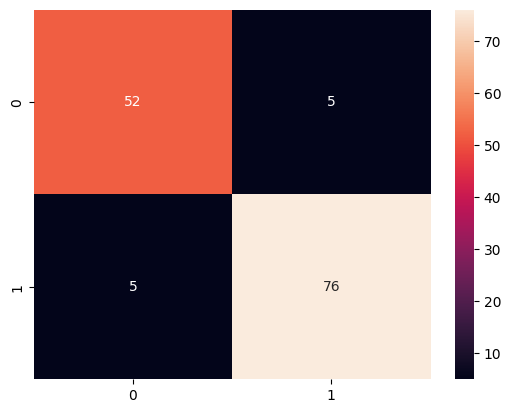

In [27]:
# Representamos los datos predichos coloreando los aciertos y los fallos
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True)
plt.show()


###5.2 Support Vector Machine for Classification (SVC)

El SVC es una implementación del algoritmo Support Vector Machine (SVM) para clasificación. Utiliza hiperplanos para separar las clases en el espacio de características.

Funcionamiento:
* SVC busca un hiperplano óptimo que maximice el margen entre las clases (distancia entre el hiperplano y los puntos más cercanos, llamados vectores de soporte).

* Si los datos no son linealmente separables, utiliza kernels (transformaciones) para proyectar los datos a un espacio de mayor dimensión donde puedan separarse.

In [98]:
# Create a SVC object
from sklearn.svm import SVC
classifierSVC = SVC(kernel = "poly", probability=True, random_state = 0)
#rbf= radial basic funvtion, se usa cuando los datos no son linealmente separables
#en el caso de que sean linealmente separables usar kernel = linear
#poly= relaciones polinómicas
classifierSVC.fit(x_train1_sc, y_train1)

SVC(kernel='poly', probability=True, random_state=0)

In [99]:
y_pred_SVC  = classifierSVC.predict(x_test1_sc)
print(y_pred_SVC)
print(y_test1)

[ True  True  True  True  True False  True False False  True False  True
  True  True  True False  True False  True  True  True False  True False
  True  True False  True  True False False False False False  True  True
  True  True False False  True  True  True False False False  True False
 False  True False  True  True False  True False  True False  True False
  True  True  True False False  True  True  True False  True  True False
  True  True False  True False  True  True  True  True  True  True  True
  True  True False False False False  True  True False  True  True  True
  True  True  True  True  True False  True  True  True False False False
  True False False  True False False False False  True False False  True
  True  True  True False  True False  True False  True  True False  True
 False  True  True  True  True  True]
900    True
570    True
791    True
189    True
372    True
       ... 
531    True
535    True
602    True
448    True
592    True
Name: HeartDisease, Length:

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred_SVC)
print (cm)

[[50  7]
 [ 4 77]]


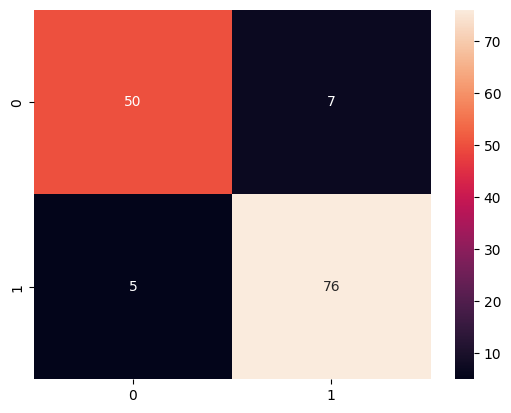

In [31]:
# se representan los y_pred_SVC
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True)
plt.show()

### 5.3. Aplicación del modelo Naive Bayes

El modelo Naive Bayes es un algoritmo de clasificación basado en el teorema de Bayes, que asume que las características son independientes entre sí, de ahí el término "naive" (ingenuo).



In [106]:
# Create a Naive Bayes object
from sklearn.naive_bayes import GaussianNB
classifierNaiveBayes = GaussianNB()
classifierNaiveBayes.fit(x_train1_sc, y_train1)

GaussianNB()

In [107]:
y_pred_NaiveBayes  = classifierNaiveBayes.predict(x_test1_sc)
print(y_pred_NaiveBayes)
print(y_test1)

[ True  True  True  True  True False  True False False False False  True
 False  True  True False  True False  True  True  True False  True False
 False  True False  True  True False False False False False  True  True
  True  True False False  True  True  True False False False  True False
 False  True False  True  True False  True False  True False  True False
  True  True  True False False  True  True  True False  True  True False
  True  True False  True False  True  True False  True  True  True  True
  True  True False False False False  True  True False  True  True  True
  True  True  True False  True False  True False  True False False False
  True False False  True False False False False  True False False  True
  True  True  True False  True False  True False  True  True False  True
 False  True  True  True  True  True]
900    True
570    True
791    True
189    True
372    True
       ... 
531    True
535    True
602    True
448    True
592    True
Name: HeartDisease, Length:

In [108]:
cm = confusion_matrix(y_test1, y_pred_NaiveBayes)
print (cm)

[[52  5]
 [ 8 73]]


### 5.4. Representación de las predicciones

#### 5.4.1. Para KNN

In [113]:
import matplotlib.pyplot as plt
import plotly.express as px

# se listan las variables disponibles
feature_names = x1.columns.tolist()
print("Variables disponibles: \n", feature_names)
print('\n')
feature_indices = []

while True:
    try:
        feature_index = int(input("Introduce el índice de la variable a representar (o -1 para finalizar): "))
        if feature_index == -1:
            break
        elif 0 <= feature_index < len(feature_names):
            feature_indices.append(feature_index)
        else:
            print("Invalid feature index. Please try again.")
    except ValueError:
        print("Invalid input. Please enter an integer.")

selected_features = [feature_names[i] for i in feature_indices]

# se comprueba que el usuario ha elegido dos variables
if len(selected_features) != 2:
    print("Debes seleccionar exactamente dos variables.")

else:
  print("Variables seleccionadas:", selected_features)

  # se crea el gráfico de dispersión para los datos de test
  fig1 = px.scatter(x=x_test1.iloc[:, feature_indices[0]],
                    y=x_test1.iloc[:, feature_indices[1]],
                    color=y_test1)
  #se añaden los titulos de los ejes y del grafico
  fig1.update_layout(
        title="Gráfico de dispersión HeartDisease: Datos de test",
        xaxis_title=selected_features[0],
        yaxis_title=selected_features[1]
  )

  # se muestra el gráfico
  fig1.show()

  # se crea el gráfico de dispersión para los datos de test
  fig2 = px.scatter(x=x_test1.iloc[:, feature_indices[0]],
                    y=x_test1.iloc[:, feature_indices[1]],
                    color=y_pred_K_NN)
  #se añaden los titulos de los ejes y del grafico
  fig2.update_layout(
        title="Gráfico de dispersión HeartDisease: Datos predichos",
        xaxis_title=selected_features[0],
        yaxis_title=selected_features[1]
  )

  # se muestra el gráfico
  fig2.show()

  #mostramos el numero de fallos y aciertos
  print("Aciertos: ", (y_test1 == y_pred_K_NN).sum())
  print("Fallos: ", (y_test1 != y_pred_K_NN).sum())

Variables disponibles: 
 ['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'ST_Slope', 'Sex', 'ExerciseAngina']


Introduce el índice de la variable a representar (o -1 para finalizar): 0
Introduce el índice de la variable a representar (o -1 para finalizar): 3
Introduce el índice de la variable a representar (o -1 para finalizar): -1
Variables seleccionadas: ['Age', 'Cholesterol']


Aciertos:  128
Fallos:  10


#### 5.4.2. Para SVC

In [112]:
import matplotlib.pyplot as plt
import plotly.express as px

# se listan las variables disponibles
feature_names = x1.columns.tolist()
print("Variables disponibles: \n", feature_names)
print('\n')
feature_indices = []

while True:
    try:
        feature_index = int(input("Introduce el índice de la variable a representar (o -1 para finalizar): "))
        if feature_index == -1:
            break
        elif 0 <= feature_index < len(feature_names):
            feature_indices.append(feature_index)
        else:
            print("Invalid feature index. Please try again.")
    except ValueError:
        print("Invalid input. Please enter an integer.")

selected_features = [feature_names[i] for i in feature_indices]

# se comprueba que el usuario ha elegido dos variables
if len(selected_features) != 2:
    print("Debes seleccionar exactamente dos variables.")

else:
  print("Variables seleccionadas:", selected_features)

  # se crea el gráfico de dispersión para los datos de test
  fig1 = px.scatter(x=x_test1.iloc[:, feature_indices[0]],
                    y=x_test1.iloc[:, feature_indices[1]],
                    color=y_test1)
  #se añaden los titulos de los ejes y del grafico
  fig1.update_layout(
        title="Gráfico de dispersión HeartDisease: Datos de test",
        xaxis_title=selected_features[0],
        yaxis_title=selected_features[1]
  )

  # se muestra el gráfico
  fig1.show()

  # se crea el gráfico de dispersión para los datos de test
  fig2 = px.scatter(x=x_test1.iloc[:, feature_indices[0]],
                    y=x_test1.iloc[:, feature_indices[1]],
                    color=y_pred_SVC)
  #se añaden los titulos de los ejes y del grafico
  fig2.update_layout(
        title="Gráfico de dispersión HeartDisease: Datos predichos",
        xaxis_title=selected_features[0],
        yaxis_title=selected_features[1]
  )

  # se muestra el gráfico
  fig2.show()

  #mostramos el numero de fallos y aciertos
  print("Aciertos: ", (y_test1 == y_pred_SVC).sum())
  print("Fallos: ", (y_test1 != y_pred_SVC).sum())


Variables disponibles: 
 ['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'ST_Slope', 'Sex', 'ExerciseAngina']


Introduce el índice de la variable a representar (o -1 para finalizar): 0
Introduce el índice de la variable a representar (o -1 para finalizar): 3
Introduce el índice de la variable a representar (o -1 para finalizar): -1
Variables seleccionadas: ['Age', 'Cholesterol']


Aciertos:  127
Fallos:  11


#### 5.4.3. Para Naive Bayes

In [114]:
import matplotlib.pyplot as plt
import plotly.express as px

# se listan las variables disponibles
feature_names = x1.columns.tolist()
print("Variables disponibles: \n", feature_names)
print('\n')
feature_indices = []

while True:
    try:
        feature_index = int(input("Introduce el índice de la variable a representar (o -1 para finalizar): "))
        if feature_index == -1:
            break
        elif 0 <= feature_index < len(feature_names):
            feature_indices.append(feature_index)
        else:
            print("Invalid feature index. Please try again.")
    except ValueError:
        print("Invalid input. Please enter an integer.")

selected_features = [feature_names[i] for i in feature_indices]

# se comprueba que el usuario ha elegido dos variables
if len(selected_features) != 2:
    print("Debes seleccionar exactamente dos variables.")

else:
  print("Variables seleccionadas:", selected_features)

  # se crea el gráfico de dispersión para los datos de test
  fig1 = px.scatter(x=x_test1.iloc[:, feature_indices[0]],
                    y=x_test1.iloc[:, feature_indices[1]],
                    color=y_test1)
  #se añaden los titulos de los ejes y del grafico
  fig1.update_layout(
        title="Gráfico de dispersión HeartDisease: Datos de test",
        xaxis_title=selected_features[0],
        yaxis_title=selected_features[1]
  )

  # se muestra el gráfico
  fig1.show()

  # se crea el gráfico de dispersión para los datos de test
  fig2 = px.scatter(x=x_test1.iloc[:, feature_indices[0]],
                    y=x_test1.iloc[:, feature_indices[1]],
                    color=y_pred_NaiveBayes)
  #se añaden los titulos de los ejes y del grafico
  fig2.update_layout(
        title="Gráfico de dispersión HeartDisease: Datos predichos",
        xaxis_title=selected_features[0],
        yaxis_title=selected_features[1]
  )

  # se muestra el gráfico
  fig2.show()

  #mostramos el numero de fallos y aciertos
  print("Aciertos: ", (y_test1 == y_pred_NaiveBayes).sum())
  print("Fallos: ", (y_test1 != y_pred_NaiveBayes).sum())


Variables disponibles: 
 ['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'ST_Slope', 'Sex', 'ExerciseAngina']


Introduce el índice de la variable a representar (o -1 para finalizar): 0
Introduce el índice de la variable a representar (o -1 para finalizar): 3
Introduce el índice de la variable a representar (o -1 para finalizar): -1
Variables seleccionadas: ['Age', 'Cholesterol']


Aciertos:  125
Fallos:  13


## 6. Reducción a dos variables

### 6.1. Aplicacion del metodo RFE

En este caso vamos a aplicar un solver diferente basado en esto:

1. **`lbfgs`**: Generalmente la **mejor opción por defecto**. Funciona en la mayoría de los casos.  
2. **`liblinear`**: Útil si trabajas con **datasets pequeños o sparse**.  
3. **`sag` / `saga`**: Recomendados para **datasets grandes**.  
4. **`newton-cg`**: Bueno para problemas **multi-clase**.  



In [117]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='sag')
rfe = RFE(model, n_features_to_select=2)
rfe.fit(x_train_sc, y_train)

feature_names = x.columns.tolist()
print("Variables: \n", feature_names)
print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)



Variables: 
 ['Age', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'Oldpeak', 'ST_Slope', 'Sex', 'ExerciseAngina']
Num Features: 2
Selected Features: [False False False False False False False False  True False  True]
Feature Ranking: [10  4  8  7  3  9  6  5  1  2  1]


In [118]:
# se extraen del 'dataset5' las columnas con mejor puntuación en el ranking, es decir,
# 'ExerciseAngina' y 'ST_Slope' y se almacena en 'data2'
data2 = dataset5.loc[:, ['ExerciseAngina', 'ST_Slope', 'HeartDisease']]
data2


,ExerciseAngina,ST_Slope,HeartDisease
0,False,3,False
1,False,2,True
2,False,3,False
3,True,2,True
4,False,3,False
...,...,...,...
913,False,2,True
914,False,2,True
915,True,2,True
916,False,2,True


In [144]:
# se genera la variable 'y2' con la variables 'HeartDisease' del dataset
y2 = data2['HeartDisease']

# se genera la variable 'x2' con el resto de variables del dataset
x2 = data2.drop(['HeartDisease'], axis=1)

# Ahora se procede a dividir ambos conjuntos de datos, en conjuntos de
# entrenamiento y prueba. Para datos de entrenamiento se va a dejar el 85% del
# total y el 15% restante serán datos de test
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.15, random_state=1)

# Normalizamos los datos
from sklearn.preprocessing import StandardScaler
sc2 = StandardScaler()
x_train2_sc = sc2.fit_transform(x_train2)
x_test2_sc = sc2.transform(x_test2)

print('y2:')
print(y2)
print('\n x2:')
print(x2)
print('\n x_train2:')
print(x_train2)
print('\n x_test2')
print(x_test2)
print('\n y_train2:')
print(y_train2)
print('\n y_test2:')
print(y_test2)
print('\n x_train2_sc:')
print(x_train2_sc)
print('\n x_test2_sc:')
print(x_test2_sc)

y2:
0      False
1       True
2      False
3       True
4      False
       ...  
913     True
914     True
915     True
916     True
917    False
Name: HeartDisease, Length: 918, dtype: bool

 x2:
     ExerciseAngina  ST_Slope
0             False         3
1             False         2
2             False         3
3              True         2
4             False         3
..              ...       ...
913           False         2
914           False         2
915            True         2
916           False         2
917           False         3

[918 rows x 2 columns]

 x_train2:
     ExerciseAngina  ST_Slope
148           False         3
530            True         2
446            True         2
181           False         3
47            False         3
..              ...       ...
767           False         3
72            False         2
908            True         3
235            True         2
37            False         3

[780 rows x 2 columns]

 x_test2
     Exercis

### 6.2. Aplicación del modelo (K-NN)

In [145]:
# Create a K-NN object
from sklearn.neighbors import KNeighborsClassifier
classifierK_NN2 = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
classifierK_NN2.fit(x_train2_sc, y_train2)

KNeighborsClassifier()

In [146]:
y_pred_K_NN2  = classifierK_NN2.predict(x_test2_sc)
print('y_pred_K_NN2:')
print(y_pred_K_NN2)
print('\n y_test2:')
print(y_test2)

y_pred_K_NN2:
[False  True  True  True  True False  True False False  True False  True
  True  True  True False  True False  True  True  True False  True False
  True  True False  True  True False False False  True False  True  True
  True  True False  True  True False  True False False False  True False
 False False False  True  True False False False  True False  True False
  True  True False  True False  True  True  True False  True  True False
  True  True False  True False  True  True  True  True  True  True  True
  True  True False  True False False  True  True False False  True  True
  True  True  True  True  True False  True  True  True False False  True
  True False False  True False False False False  True False  True  True
  True False  True False  True False  True  True  True  True False False
 False  True  True  True  True  True]

 y_test2:
900    True
570    True
791    True
189    True
372    True
       ... 
531    True
535    True
602    True
448    True
592    True
Na

In [147]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test2, y_pred_K_NN2)
print (cm)

[[45 12]
 [10 71]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

<ipython-input-153-b3817b8488b1>:17: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



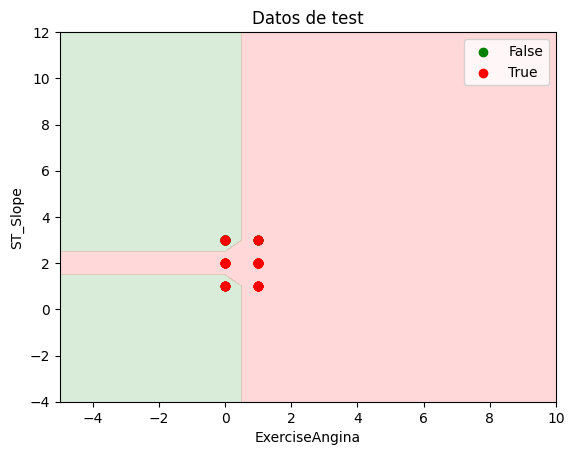

Aciertos:  116
Fallos:  22


In [153]:
### 6.3. Representación del resultado

# Plotting the meshgrid
from matplotlib.colors import ListedColormap
x_set, y_set = x_test2.values, y_test2.values
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-5, stop = x_set[:, 0].max()+10 , step = 1),
                     np.arange(start = x_set[:, 1].min()-5 , stop = x_set[:, 1].max()+10 , step = 1))
X_meshgrid=np.array([X1.ravel(), X2.ravel()]).T
X_meshgrid_sc=sc2.transform(X_meshgrid)
plt.contourf(X1, X2, classifierK_NN2.predict(X_meshgrid_sc).reshape(X1.shape),
             alpha = 0.15, cmap = ListedColormap(['green', 'red']) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotting the training data results
for  i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(['green', 'red'])(i), label = j)
plt.title('Datos de test')
plt.xlabel('ExerciseAngina')
plt.ylabel('ST_Slope')
plt.legend()
plt.show()

#mostramos el numero de fallos y aciertos
print("Aciertos: ", (y_test2 == y_pred_K_NN2).sum())
print("Fallos: ", (y_test2 != y_pred_K_NN2).sum())

In [169]:
import matplotlib.pyplot as plt
import plotly.express as px

# se listan las variables disponibles
feature_names = x2.columns.tolist()
print("Variables disponibles: \n", feature_names)
print('\n')
feature_indices = []

while True:
    try:
        feature_index = int(input("Introduce el índice de la variable a representar (o -1 para finalizar): "))
        if feature_index == -1:
            break
        elif 0 <= feature_index < len(feature_names):
            feature_indices.append(feature_index)
        else:
            print("Invalid feature index. Please try again.")
    except ValueError:
        print("Invalid input. Please enter an integer.")

selected_features = [feature_names[i] for i in feature_indices]

# se comprueba que el usuario ha elegido dos variables
if len(selected_features) != 1:
    print("Debes seleccionar exactamente una variable.")

else:
  print("Variable seleccionada:", selected_features)

  # se crea el gráfico de dispersión para los datos de test
  fig3 = px.histogram(x=x_test2.iloc[:, feature_indices[0]],
                    color=y_test2,
                    color_discrete_map={True: 'green', False: 'red'})
  #se añaden los titulos de los ejes y del grafico
  fig3.update_layout(
        title="Histograma HeartDisease: Datos de test",
        xaxis_title=selected_features[0],
  )

  # se muestra el gráfico
  fig3.show()

  # se crea el gráfico de dispersión para los datos de test
  fig4 = px.histogram(x=x_test2.iloc[:, feature_indices[0]],
                    color=y_pred_K_NN2,
                    color_discrete_map={True: 'green', False: 'red'})
  #se añaden los titulos de los ejes y del grafico
  fig4.update_layout(
        title="Histograma HeartDisease: Datos predichos",
        xaxis_title=selected_features[0],
  )

  # se muestra el gráfico
  fig4.show()

  #mostramos el numero de fallos y aciertos
  print("Aciertos: ", (y_test2 == y_pred_K_NN2).sum())
  print("Fallos: ", (y_test2 != y_pred_K_NN2).sum())

Variables disponibles: 
 ['ExerciseAngina', 'ST_Slope']


Introduce el índice de la variable a representar (o -1 para finalizar): 0
Introduce el índice de la variable a representar (o -1 para finalizar): -1
Variable seleccionada: ['ExerciseAngina']


Aciertos:  116
Fallos:  22
